<a href="https://colab.research.google.com/github/baldpanda/beginner_scraper/blob/tidy-notebook/beginner_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginner Scraper

Notebook for learning how to scrape data from webpages. The plan is to start scraping this [website](http://books.toscrape.com/), which is designed for learning to scrape. It is a simple book store with pagination and a navigation bar. Each book has an image of the front cover, a title, a status (in stock, out of stock), and a rating out of 5 stars.

### Requests

The requests library allows the user to send HTTP requests to a URL. It abstracts a lot of the complexity behind interacting with APIs.



### Beautiful Soup

Beautiful soup allows users to extract data out of XML and HTML formats, into a more usable format.  


In [0]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
WEBSITE_URL = "http://books.toscrape.com/"
web_url = requests.get(WEBSITE_URL).text

In [3]:
print(BeautifulSoup(web_url).prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="

In [0]:
books_section = BeautifulSoup(web_url, 'html.parser').find_all('ol')[0]

In [0]:
ratings = books_section.find_all('p')[0::3]

In [0]:
first_page_ratings = [rating['class'][1] for rating in ratings]

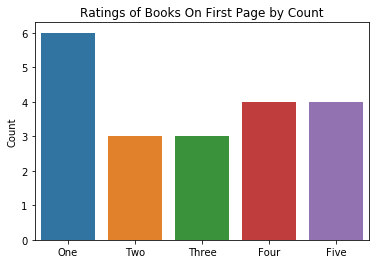

In [7]:
ax = sns.countplot(first_page_ratings, 
                   order=['One', 'Two', 'Three', 'Four', 'Five'])

ax.set(ylabel = 'Count', title = 'Ratings of Books On First Page by Count');

In [0]:
costs = books_section.find_all('p')[1::3]

In [0]:
first_page_book_costs = [float(cost.get_text()[2:]) for cost in costs]

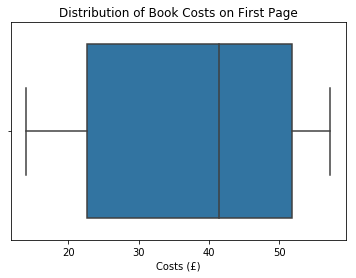

In [20]:
ax = sns.boxplot(first_page_book_costs);
ax.set(xlabel = 'Costs (£)', title = 'Distribution of Book Costs on First Page');